In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
data = pd.read_csv('/content/gdrive/MyDrive/Hotel_Reviews.csv')

In [91]:
data.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


In [28]:
data.describe(include='all')

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
count,515738,515738.000000,515738,515738.000000,515738,515738,515738,515738.000000,515738.000000,515738,515738.000000,515738.000000,515738.000000,515738,515738,512470.000000,512470.000000
unique,1493,NaN,731,NaN,1492,227,330011,NaN,NaN,412601,NaN,NaN,NaN,55242,731,NaN,NaN
top,163 Marsh Wall Docklands Tower Hamlets London ...,NaN,8/2/2017,NaN,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,NaN,NaN,No Positive,NaN,NaN,NaN,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days,NaN,NaN
freq,4789,NaN,2585,NaN,4789,245246,127890,NaN,NaN,35946,NaN,NaN,NaN,5101,2585,NaN,NaN
mean,NaN,498.081836,NaN,8.397487,NaN,NaN,NaN,18.539450,2743.743944,NaN,17.776458,7.166001,8.395077,NaN,NaN,49.442439,2.823803
std,NaN,500.538467,NaN,0.548048,NaN,NaN,NaN,29.690831,2317.464868,NaN,21.804185,11.040228,1.637856,NaN,NaN,3.466325,4.579425
min,NaN,1.000000,NaN,5.200000,NaN,NaN,NaN,0.000000,43.000000,NaN,0.000000,1.000000,2.500000,NaN,NaN,41.328376,-0.369758
25%,NaN,169.000000,NaN,8.100000,NaN,NaN,NaN,2.000000,1161.000000,NaN,5.000000,1.000000,7.500000,NaN,NaN,48.214662,-0.143372
50%,NaN,341.000000,NaN,8.400000,NaN,NaN,NaN,9.000000,2134.000000,NaN,11.000000,3.000000,8.800000,NaN,NaN,51.499981,0.010607
75%,NaN,660.000000,NaN,8.800000,NaN,NaN,NaN,23.000000,3613.000000,NaN,22.000000,8.000000,9.600000,NaN,NaN,51.516288,4.834443


#**1) How many reviewers from each nation**

#**a) Highest reviewers from which nationality**

Text(0.5, 1.0, 'Total Reviews by Country')

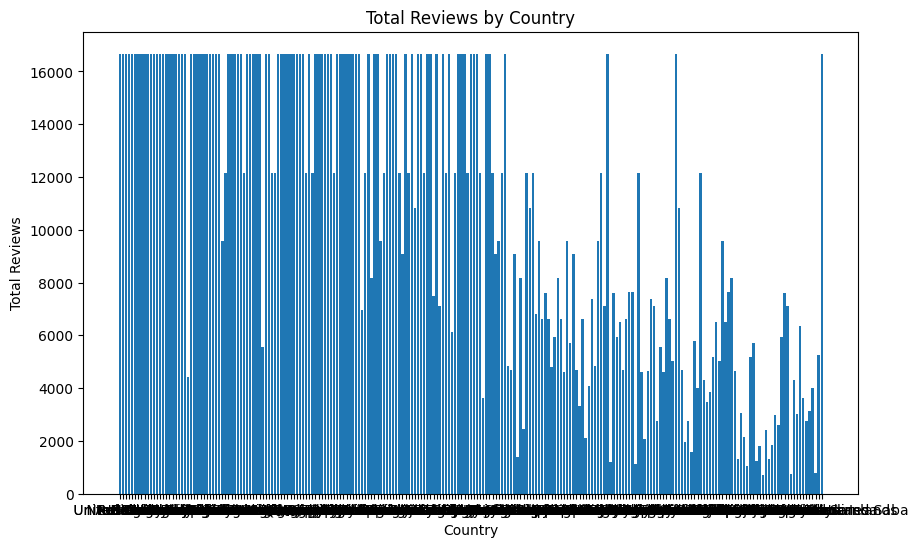

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(data['Reviewer_Nationality'], data['Total_Number_of_Reviews'])
plt.xlabel('Country')
plt.ylabel('Total Reviews')
plt.title('Total Reviews by Country')

In [29]:
data.groupby('Reviewer_Nationality')['Total_Number_of_Reviews'].sum()

Reviewer_Nationality
                       1497172
 Abkhazia Georgia       372794
 Afghanistan             24757
 Albania                840989
 Algeria                214010
                        ...   
 Vietnam                426242
 Wallis and Futuna        9823
 Yemen                   45712
 Zambia                  96483
 Zimbabwe               151044
Name: Total_Number_of_Reviews, Length: 227, dtype: int64

In [30]:
data.sort_values(by='Total_Number_of_Reviews', ascending=False).iloc[0]['Reviewer_Nationality']

' Israel '

#**b) Lowest Reviewers from which nationality **

In [31]:
data.sort_values(by='Total_Number_of_Reviews', ascending=True).iloc[0]['Reviewer_Nationality']

' United Kingdom '

#**2) Property with best review_score overall and least score overall**

In [32]:
data.groupby('Hotel_Name')['Total_Number_of_Reviews'].sum()

Hotel_Name
11 Cadogan Gardens                      62487
1K Hotel                                98124
25hours Hotel beim MuseumsQuartier    2979236
41                                      25132
45 Park Lane Dorchester Collection       1904
                                       ...   
citizenM London Bankside              5767634
citizenM London Shoreditch            1770694
citizenM Tower of London              7862976
every hotel Piccadilly                 957080
pentahotel Vienna                      103845
Name: Total_Number_of_Reviews, Length: 1492, dtype: int64

In [33]:
data.sort_values(by='Total_Number_of_Reviews', ascending=False).iloc[0]['Hotel_Name']

'Hotel Da Vinci'

In [34]:
data.sort_values(by='Total_Number_of_Reviews', ascending=True).iloc[0]['Hotel_Name']

'Hotel Daniel Paris'

#**3) Do a scatter plot to show all properties over lat and long**

In [106]:
data.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [77]:
# mean_latitude = data_filled.groupby('Hotel_Address')['lat'].transform('mean')
# mean_longitude = data_filled.groupby('Hotel_Address')['lng'].transform('mean')


# # Fill the 'None' values with the calculated means
# data_filled['lat'].fillna(mean_latitude, inplace=True)
# data_filled['lng'].fillna(mean_longitude, inplace=True)

In [112]:
hotel_mapping = {}
for index, row in data.iterrows():
    hotel_name = row['Hotel_Name']
    if not pd.isna(row['lng']) and not pd.isna(row['lat']):
        hotel_mapping[hotel_name] = {'lng': row['lng'], 'lat': row['lat']}

# Fill missing values based on the mapping
for index, row in data.iterrows():
    hotel_name = row['Hotel_Name']
    if pd.isna(row['lng']) or pd.isna(row['lat']):
        if hotel_name in hotel_mapping:
            data.at[index, 'lng'] = hotel_mapping[hotel_name]['lng']
            data.at[index, 'lat'] = hotel_mapping[hotel_name]['lat']


In [ ]:
# data['Longitude'] = data['Hotel_Name'].map(lambda x: hotel_location_mapping[x]['lng'] if x in hotel_location_mapping else None)
# data['Latitude'] = data['Hotel_Name'].map(lambda x: hotel_location_mapping[x]['lat'] if x in hotel_location_mapping else None)

In [113]:
data.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

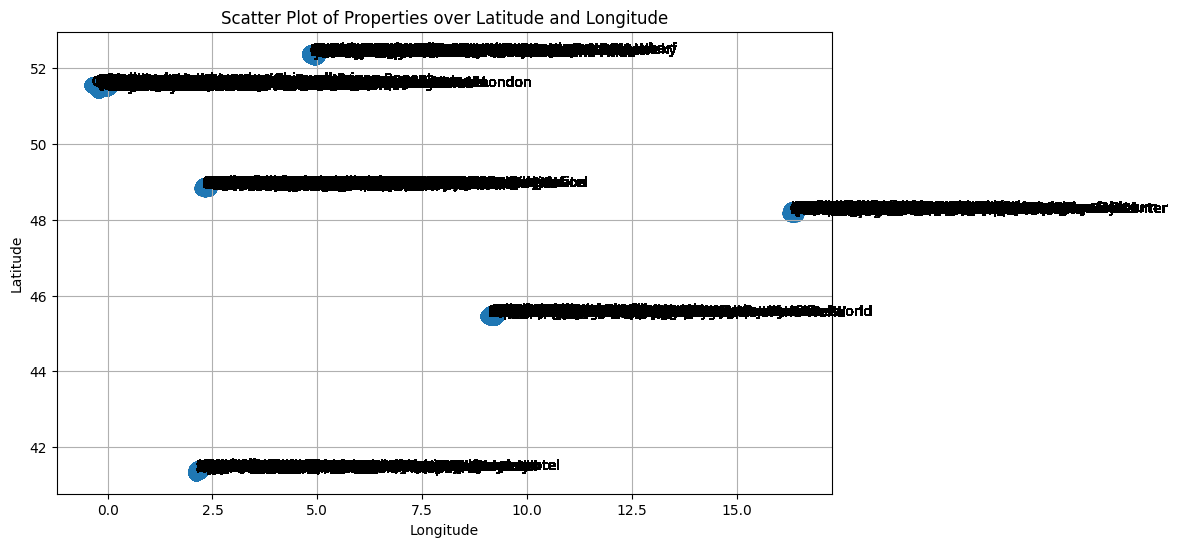

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(data['lng'], data['lat'], marker='o', s=100)

# Label the points with property names
for i, name in enumerate(data['Hotel_Name']):
    plt.annotate(name, (data['lng'][i], data['lat'][i]))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Properties over Latitude and Longitude')
plt.grid(True)
# plt.show()


#**4) Which property has highest reviews and lowest  in last 1 month of the dataset maximum date **

In [86]:
# Calculate the maximum date in the dataset
max_date = data['Review_Date'].max()

In [85]:
max_date

'9/9/2016'

In [97]:
# Calculate the start date for the last month (1 month before the maximum date)
max_date = pd.Timestamp(max_date)
one_month_offset = pd.DateOffset(months=1)

last_month_start = max_date - one_month_offset
last_month_start

Timestamp('2016-08-09 00:00:00')

In [98]:
# Filter for the last 1 month based on the maximum date

data['Review_Date'] = pd.to_datetime(data['Review_Date'])  # Convert the entire 'Review_Date' column to Timestamp

filtered_data = data[(data['Review_Date'] > last_month_start) & (data['Review_Date'] <= max_date)]

In [99]:
filtered_data.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,25547.000000,25547.000000,25547.000000,25547.000000,25547.000000,25547.000000,25547.000000,25380.000000,25380.000000
mean,487.440561,8.417724,18.547422,2814.764278,18.729949,6.790739,8.455412,49.153467,3.109267
std,492.729257,0.533372,29.890703,2392.795051,22.805764,10.146769,1.629584,3.642709,4.668440
min,4.000000,6.400000,0.000000,54.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,166.000000,8.100000,2.000000,1191.000000,6.000000,1.000000,7.500000,48.202491,-0.131917
50%,334.000000,8.400000,9.000000,2200.000000,12.000000,3.000000,8.800000,51.496740,2.159337
75%,636.000000,8.800000,23.000000,3774.000000,24.000000,8.000000,9.600000,51.516048,4.875640
max,2682.000000,9.800000,403.000000,16670.000000,382.000000,181.000000,10.000000,52.400181,16.429233


In [102]:
filtered_data.groupby('Hotel_Name')['Total_Number_of_Reviews'].sum()

Hotel_Name
11 Cadogan Gardens                      3930
1K Hotel                                3978
25hours Hotel beim MuseumsQuartier    129720
41                                      1708
45 Park Lane Dorchester Collection       136
                                       ...  
citizenM London Bankside              315566
citizenM London Shoreditch             23243
citizenM Tower of London              569984
every hotel Piccadilly                 32015
pentahotel Vienna                       4025
Name: Total_Number_of_Reviews, Length: 1371, dtype: int64

In [101]:
filtered_data.sort_values(by='Total_Number_of_Reviews', ascending=False).iloc[0]['Hotel_Name']

'Hotel Da Vinci'

In [103]:
filtered_data.sort_values(by='Total_Number_of_Reviews', ascending=True).iloc[0]['Hotel_Name']

'Renaissance Paris Republique Hotel Spa'